# Day022 : 特徵工程 簡介
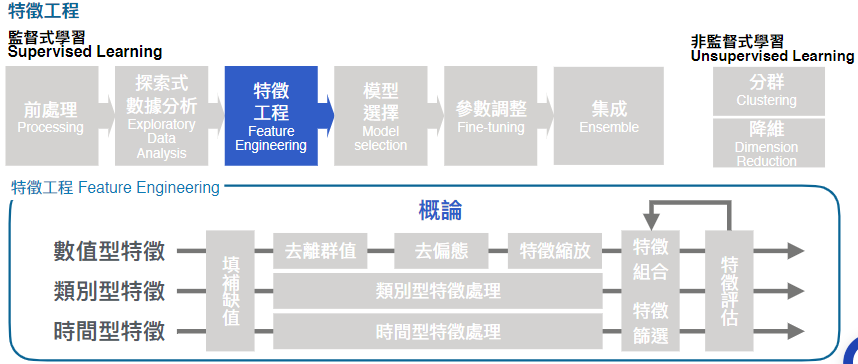

## [知識重點目標]
- 初步理解特徵工程的概念
- 能從程式中辨識特徵工程的區塊與意義
- 知道特徵工程至少需要哪些部分

甚麼是特徵工程?
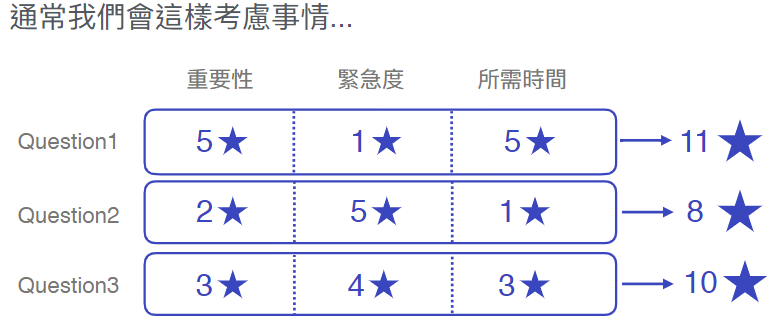

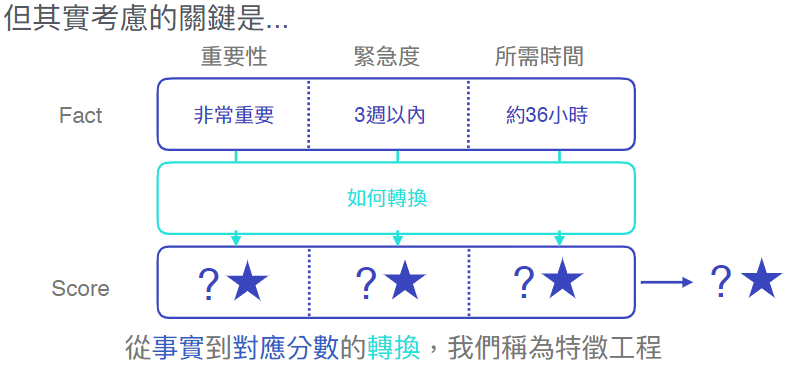

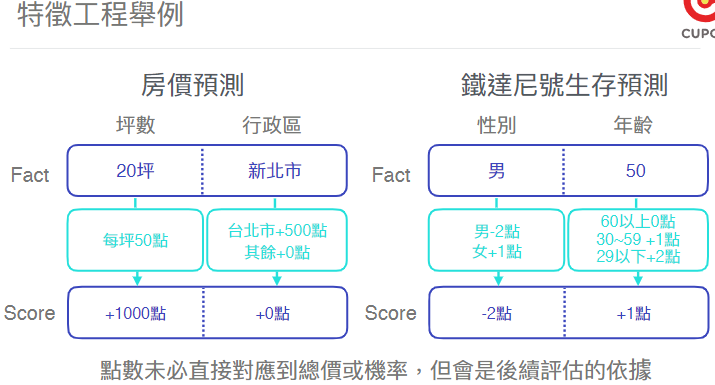

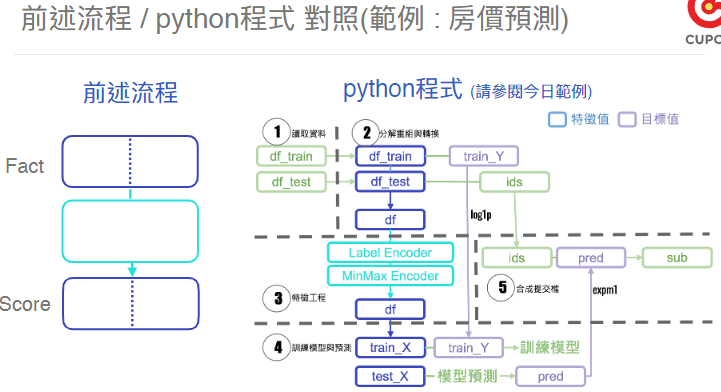

## [重要知識點複習]

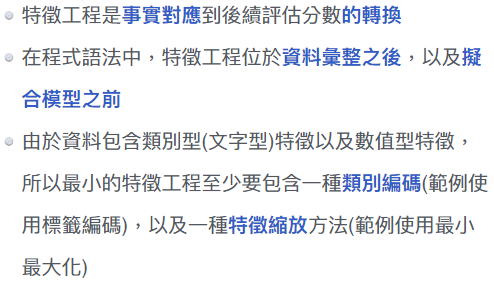

## [推薦延伸閱讀]
[知乎-特徵工程到底是什麼](https://www.zhihu.com/question/29316149)

本⽂重點為下圖，主要是希望同學大致知道特徵工程大致包含哪些部分，若對細節有興趣，還可以從這篇中了解一些概念其中⼀部分的內容，會在後面的課程中說明並練習，詳情請參閱百日馬拉松課綱。


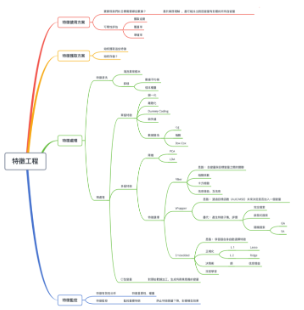

[痞客幫-iT邦2019鐵⼈人賽 : 為什麼特徵工程很重要](https://ithelp.ithome.com.tw/articles/10200041?sc=iThelpR)

本文主要在描述現實中資料科學工作的時間比重(下圖)，其中大部分的時間在於資料清理，少部分為特徵探勘，雖然這兩部份都是特徵工程，但在學習階段與實務階段，比重卻有著天壤之別。

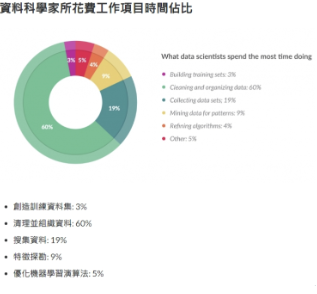

## [作業目標]
依照下列程式碼回答下列問題, 初步理解什麼是"特徵工程"的區塊

## [作業重點]
1. 下列A~E五個程式區塊中，哪一塊是特徵工程?

    Ans : C
    
    
2. 對照程式區塊 B 與 C 的結果，請問那些欄位屬於"類別型欄位"? (回答欄位英文名稱即可)

    Ans :
    Name, Sex, Ticket, Cabin, Embarked 等五個欄位

    註 : 像是 Pclass 這樣的欄位, 雖然就意義上而言是類別型欄位, 但因為裡面都是數值,
    因此 Python 讀取時會先將其判定為數值欄位, 希望同學了解語言判定與人為理解上的落差,
    因為 Python 不須宣告物件型別, 都是自動判定, 這點雖然方便, 卻也是初學者常常遇到的困難所在
    

3. 續上題，請問哪個欄位是"目標值"?

    Survived 是目標值

In [1]:
# 程式區塊 A
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

data_path = 'data/'
df_train = pd.read_csv(data_path + 'titanic_train.csv')
df_test = pd.read_csv(data_path + 'titanic_test.csv')
df_train.shape

(891, 12)

In [2]:
# 程式區塊 B
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived'] , axis=1)
df_test = df_test.drop(['PassengerId'] , axis=1)
df = pd.concat([df_train,df_test])
df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 程式區塊 C
LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = LEncoder.fit_transform(list(df[c].values))
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 w

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.118683,1.0,0.283951,0.125,0.0,0.775862,0.016072,0.000000,1.000000
1,0.0,0.218989,0.0,0.481481,0.125,0.0,0.879310,0.140813,0.575269,0.333333
2,1.0,0.400459,0.0,0.333333,0.000,0.0,0.984914,0.017387,0.000000,1.000000
3,0.0,0.323124,0.0,0.444444,0.125,0.0,0.070043,0.105390,0.381720,1.000000
4,1.0,0.016845,1.0,0.444444,0.000,0.0,0.699353,0.017630,0.000000,1.000000


In [4]:
# 程式區塊 D
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator.fit(train_X, train_Y)
pred = estimator.predict(test_X)

C:\Users\GGININDER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# 程式區塊 E
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.to_csv('titanic_baseline.csv', index=False) 